# §3. Simple Regression

Regressions quantify the relationship between dependent and independent variables. When only a single variable is considered, the regression is called a simple regression.

The following notebook represents notes taken from the *Python for Finance: Investment Fundamentals & Data Analytics* Udemy course. All credit for the content of the lecture goes to 365 Cereers.

## <a name="TOC"></a> Table of Contents:
---
1. [Simple Regression Theory](#Theory)
2. [Performing Simple Regression](#Practice)

## <a name="Theory"></a> [Simple Regression Theory](#TOC)
---

<img name="Frontier" src="Figures\Simple.Regression.JPG" alt="Drawing" style="width: 400px;" align = "right"/>

Simple regression assumes a linear relationship between an independent and a dependent variable. For instance, we can consider the relationship between ambient temperature and electricity usage or the size of a house and the price of said house. In each case, we know from experience that these variables are possitively correlated to each other. However, we also know that ambient temperature will not cause a local spike in electricity usage in the Sahara, where very few people live, for example. Nor will the size of a house in Ankorage have the same price as a house of the same size in New York City. We gather that some relationships exist between two variables, but not all regressions are useful.

Regression, simply put, is attemping to minimize the distance between the fit line and the data points. Once the line has minimized the distances between each point to the most optimal standard, then the model is said to be fitted to the data. Consequently, the more that the data spreads, the less efficient the regression will be.

When determining the reliability of a regression, we can use the R-squared value of our model. This tool is typically expressed as a percentage, where a higher percentage represents a greater predictive power from the model. Generally, an R-square of a simple regression ought to be greater than 20% to have any reliability.

## <a name="Practice"></a> [Performing Simple Regression](#TOC)
---

In the following regression, we will use the statsmodels library but there are many alternative libraries for regression analysis.

In [34]:
# ---------------- IMPORT LIBRARIES ---------------- #

# Standard mathematics
import numpy as np
import pandas as pd

# Access data from directory
from pathlib import Path

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical models
from scipy import stats
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# ---------------- LOAD DATA ---------------- #

# Define subdirectory
root = Path('Data')

# Import the data from subdirectory
Data = pd.read_csv(root / 'Housing.Data.csv')

# Look at first 5 instances of the data
Data.head(4)


,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000


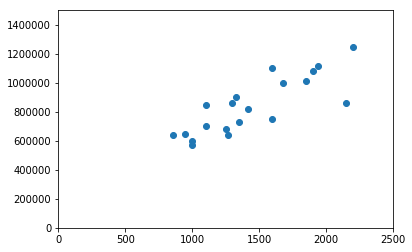

In [35]:
# ---------------- PREPROCESSING ---------------- #

# Split data into variables
X = Data['House Size (sq.ft.)']
Y = Data['House Price']


# ---------------- VISUALIZE DATA ---------------- #

# Plot scatter
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()


In [39]:
# ---------------- PERFORM REGRESSION ---------------- #

# Assign independent variable
X1 = sm.add_constant(X)

# Run regression
reg = sm.OLS(Y, X1).fit()

# Analyze results
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           8.13e-06
Time:                        01:36:44   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our regressional results, we can see that the model has identified house prices as our dependent variable and is using *Ordinary Least Squares* to perform the regression analysis. From our R-squared value, we can see that the independent variable of house size can explain 67.8% of the dependent variable house price. This is a strong predictive value from our data but it is by no means complete in its explanatory power.

The next table gives us the numeric values for the regression line. The constant coefficient of 2.608e+05 (260,800) is the y-intercept of our regression line. Next the coefficient of House Size represents the increase in house value per square foot increase in house size, but it will vary by approximately 65 dollars. In other words, it is the slope of the regression line. Using these values, we can derive the following linear regression line:

$$
\text{House Price} = 402 * (\text{House Size}) + 260,800
$$

Instead of using the OLS model from the statsmodels API, we could use scipy's tools like so:

In [46]:
# ---------------- PERFORM REGRESSION ---------------- #

# Fit model and extract statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print("House Price = ", round(slope, 0), "* House Size + ", round(intercept, 0))
print("Confidence: ", round((r_value**2)*100, 1), "% (R-squared)")

House Price =  402.0 * House Size +  260806.0
Confidence:  67.8 % (R-squared)


We can see that, using this model, we obtained the same results but the variables are more easily accessible directly from the function call.

*Notes prepared by Austin Dial on 3/21/2019*